# Пакет `seaborn`

---

**Источники:**

[github.com/mwaskom/seaborn](https://github.com/mwaskom/seaborn)

[https://pypi.org/project/seaborn/](https://pypi.org/project/seaborn/)

[API overview](https://seaborn.pydata.org/tutorial.html)

[How to build beautiful plots with Python and Seaborn](https://livecodestream.dev/post/how-to-build-beautiful-plots-with-python-and-seaborn/)

[Long-form vs. wide-form data](https://seaborn.pydata.org/tutorial/data_structure.html)

[Rug plot](https://en.wikipedia.org/wiki/Rug_plot)

[Dot plot (statistics)](https://en.wikipedia.org/wiki/Dot_plot_(statistics))

[Data visualization using Seaborn](https://medium.datadriveninvestor.com/data-visualization-using-seaborn-ee2f21b9bc1c)

[Доверительный интервал](https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB)

---

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
!which pip

# Для Windows
# !where pip

/home/ira/anaconda3/envs/LevelUp_DataScience/bin/pip


In [2]:
# !conda install pandas matplotlib numpy seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

Для примера возьмем [данные (dataset) Gapminder World](https://www.kaggle.com/tklimonova/gapminder-datacamp-2007).

In [7]:
df = pd.read_csv('./../../data/gapminder_full.csv')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.35,706.16
1700,Zimbabwe,1992,10704340,Africa,60.38,693.42
1701,Zimbabwe,1997,11404948,Africa,46.81,792.45
1702,Zimbabwe,2002,11926563,Africa,39.99,672.04


In [8]:
# получить сведения о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## Обзор пакета `seaborn`

<img src="images/logo_seaborn.svg" heigh=400 width=400/>


[`Seaborn`](https://seaborn.pydata.org/) - это библиотека визуализации `Python`.

Пакет `Seaborn` построен поверх `matplotlib` и тесно интегрирован со структурами данных `pandas`.

Пакет `Seaborn` предоставляет высокоуровневый интерфейс для рисования привлекательной статистической графики.

ВНИМАНИЕ: `Seaborn` поддерживает Python 3.7+ и больше НЕ поддерживает Python 2.

Каждый модуль имеет одну функцию уровня фигуры (figure), которая предлагает единый интерфейс для различных функций уровня осей.

### Структура основных модулей пакета `seaborn`

Пространство имен `seaborn` плоское. Вся функциональность доступна на верхнем уровне.

Но сам код имеет иерархическую структуру с модулями функций, которые достигают одинаковых целей визуализации с помощью различных средств.

Имеется три основных модуля:
- "относительный (**relational**)"
- "распределительный (**distributional**)"
- "категориальный (**categorical**)".

Структура выглядит примерно так:

<img src="images/seaborn_function_overview.png" heigh=600 width=600/>

### "Длинные (Long-form)" и "широкие (wide-form)" данные

Большинство функций построения графиков в `seaborn` ориентированы на векторы (vectors) данных.

При построении графика `x` от `y` каждая переменная должна быть вектором. 

Пакет `Seaborn` принимает наборы данных, в которых несколько векторов организованы в виде таблиц

Существует фундаментальное различие между таблицами данных "**длинной формы (long-form)**" и "**широкой формы (wide-form)**", и `seaborn` будет рассматривать каждую по-разному.

При использовании `pandas` для представления данных в широкой форме (wide-form) используется всего несколько переменных (не более трех).

Это связано с тем, что `seaborn` не использует многоиндексную (multi-index) информацию, в которой `pandas` представляет дополнительные переменные в табличном формате.


В общем, можно думать о длинных (long) и широких (wide) наборах данных как о том, что выглядит примерно так:

<img src="images/seaborn_longform_wideform_data.png" heigh=600 width=600/>

#### Данные длинной формы (long-form)

Таблица данных **длинной формы (long-form)** имеет следующие характеристики:
- Каждая переменная представляет собой столбец (variable = column)
- Каждое наблюдение — это строка (observation = row)


В случае данных в **длинной форме (long-form)** столбцам в таблице назначаются роли на графике путем *явного присвоения* им одной из переменных.

Преимущество данных в **длинной форме (long-form)** состоит в том, что они хорошо **подходят для этой явной спецификации графика**.

График может содержать наборы данных произвольной сложности, если можно четко определить переменные и наблюдения.

Но к этому формату нужно привыкнуть, потому что часто это не модель данных, которая имеется "в голове".

In [9]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98


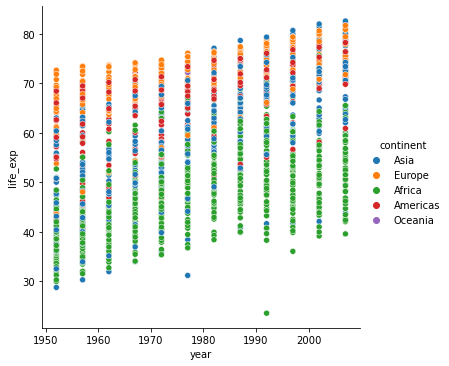

In [10]:
# по умолчанию используется тип scatter
sns.relplot(data=df, 
            x="year", 
            y="life_exp", 
            hue='continent')

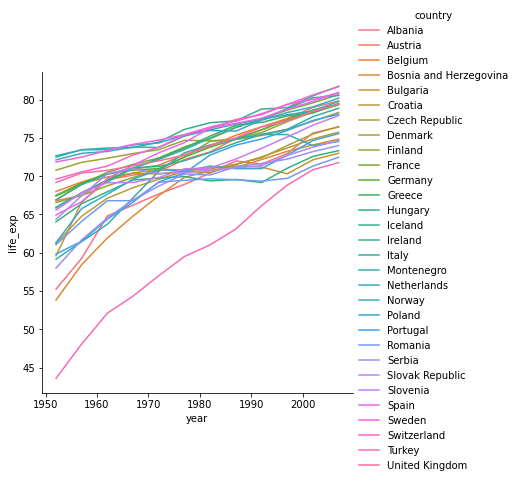

In [11]:
# плохой стиль - слишком много линий, сложно делать какие-то выводы
sns.relplot(kind="line",
            data=df[df.continent == "Europe"], 
            x="year", 
            y="life_exp", 
            hue='country')

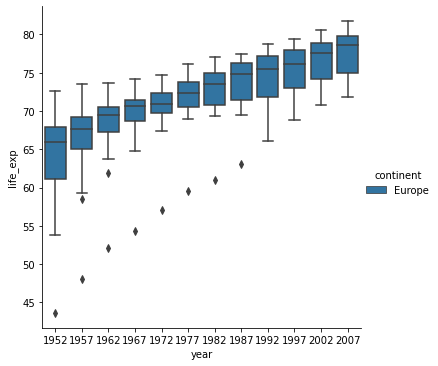

In [12]:
# можно указать тип box
sns.catplot(kind="box",
            data=df[df.continent == "Europe"], 
            x="year", 
            y="life_exp", 
            hue='continent')

#### Данные широкой формы (wide-form)

Для простых наборов данных часто бывает более интуитивно понятным думать о данных так, как они могут быть просмотрены в электронной таблице, где столбцы и строки содержат уровни различных переменных.

Например, можно преобразовать датасет в **широкую форму (wide-form)** сводной таблицей.

Здесь используются те же переменные, но они организованы по-другому. Переменные в этом наборе данных связаны с размерами таблицы, а не с именованными полями.
Каждое наблюдение определяется как значением в ячейке в таблице, так и координатами этой ячейки относительно индексов строки и столбца.

In [13]:
# среднее значение населения по году и континенту
pvt = df.pivot_table(index='year', 
                     columns='continent',
                     values='life_exp',
                     aggfunc="mean")
pvt

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,39.14,53.28,46.31,64.41,69.25
1957,41.27,55.96,49.32,66.70,70.30
1962,43.32,58.40,51.56,68.54,71.09
1967,45.33,60.41,54.66,69.74,71.31
1972,47.45,62.39,57.32,70.78,71.91
1977,49.58,64.39,59.61,71.94,72.85
1982,51.59,66.23,62.62,72.81,74.29
1987,53.34,68.09,64.85,73.64,75.32
1992,53.63,69.57,66.54,74.44,76.94


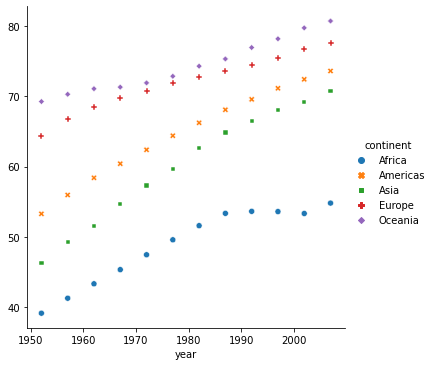

In [14]:
sns.relplot(data=pvt)

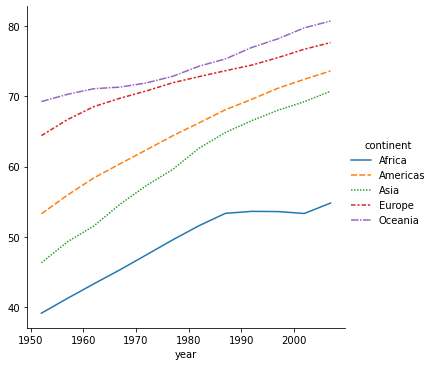

In [15]:
sns.relplot(data=pvt, 
            kind="line")

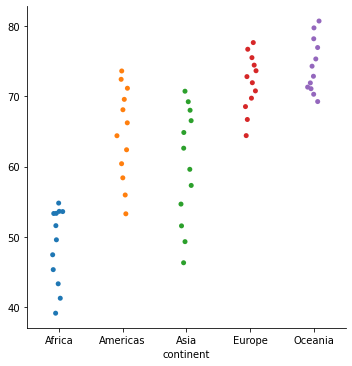

In [16]:
# по умолчанию stripplot
sns.catplot(data=pvt)

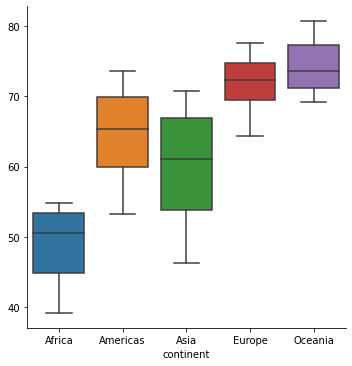

In [17]:
sns.catplot(data=pvt, kind="box")

С данными в **длинной форме (long-form)** можно получить доступ к переменным в наборе данных по их имени.

Это не относится к данным в **широкой форме (wide-form)**. Тем не менее, поскольку существует четкая связь между размерами таблицы и переменной в наборе данных, `seaborn` может назначить этим переменным роли на графике.

## Relational plots

### `scatterplot`

[seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)

*[Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

<AxesSubplot:xlabel='year', ylabel='life_exp'>

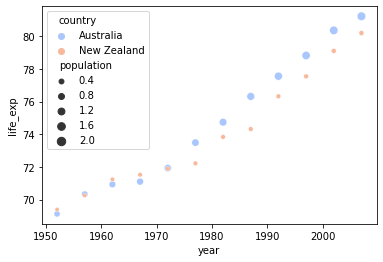

In [18]:
sns.scatterplot(data=df[df.continent == "Oceania"], 
                x='year', 
                y="life_exp", 
                hue="country",
                size="population", 
                palette='coolwarm')

### `lineplot`

[seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot)

<AxesSubplot:xlabel='year', ylabel='life_exp'>

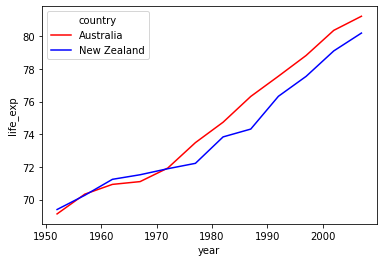

In [19]:
sns.lineplot(data=df[df.continent == "Oceania"], 
             x='year', 
             y="life_exp", 
             hue="country",
             palette=['red', 'blue'])

### `relplot`

[seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

По умолчанию `kind="scatter"`.

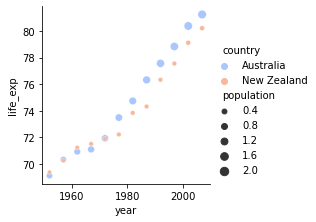

In [20]:
sns.relplot(data=df[df.continent == "Oceania"], 
            x='year', 
            y="life_exp", 
            hue="country",
            size="population", 
            palette='coolwarm',
            height=3)

**Доверительный интервал** - это интервал, в который попадают измеренные в эксперименте значения, соответствующие доверительной вероятности (например, `95%`).

<img src="images/ci_dist_plot.jpg"></img>

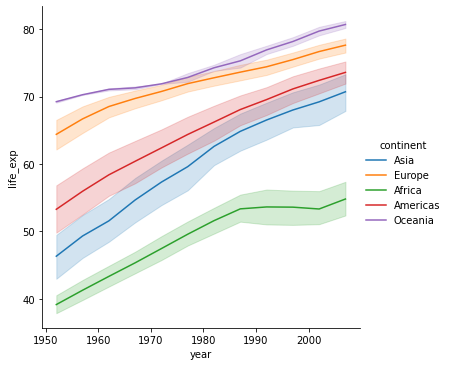

In [21]:
# можно указать тип line
# по умолчанию график показывает среднее значение (mean) - линия и 
# 95% доверительный интервал (confidence interval = CI)
sns.relplot(kind="line",
            data=df, 
            x="year", 
            y="life_exp", 
            hue='continent')

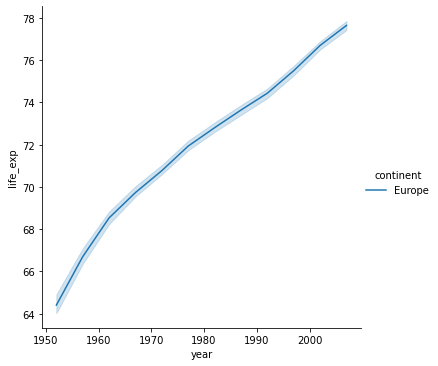

In [22]:
# график показывает среднее значение (mean) - линия и 
# 30% доверительный интервал (confidence interval = CI)
sns.relplot(kind="line",
            data=df[df.continent == "Europe"], 
            x="year", 
            y="life_exp", 
            hue='continent', 
            ci=30)

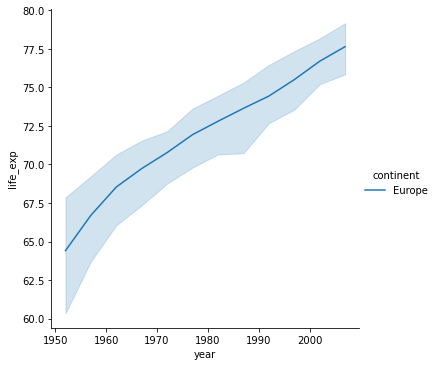

In [23]:
# график показывает среднее значение (mean) - линия и 
# 100% доверительный интервал (confidence interval = CI)
sns.relplot(kind="line",
            data=df[df.continent == "Europe"], 
            x="year", 
            y="life_exp", 
            hue='continent', 
            ci=100)

In [24]:
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.35,706.16
1700,Zimbabwe,1992,10704340,Africa,60.38,693.42
1701,Zimbabwe,1997,11404948,Africa,46.81,792.45
1702,Zimbabwe,2002,11926563,Africa,39.99,672.04


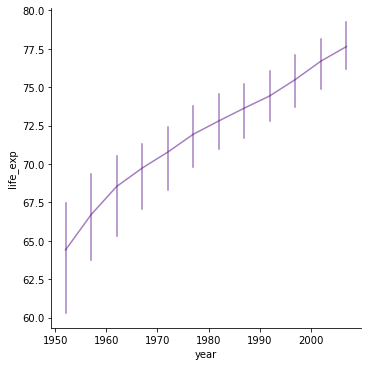

In [25]:
# график показывает среднее значение (mean) - линия и 
# 100% доверительный интервал (confidence interval = CI)
sns.relplot(kind="line",
            data=df[df.continent == "Europe"], 
            x="year", 
            y="life_exp", 
            color='indigo',
            alpha=0.5,
            ci=100, 
            err_style="bars")

## Distribution plots

### `histplot`

[seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)

<AxesSubplot:xlabel='Africa', ylabel='Count'>

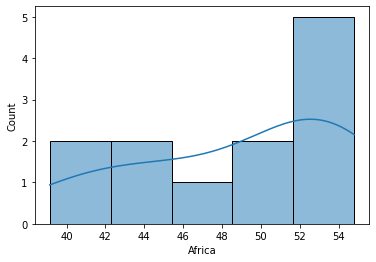

In [26]:
# по умолчанию element="bars"
sns.histplot(data=pvt.Africa, 
             kde=True)

<AxesSubplot:xlabel='Africa', ylabel='Count'>

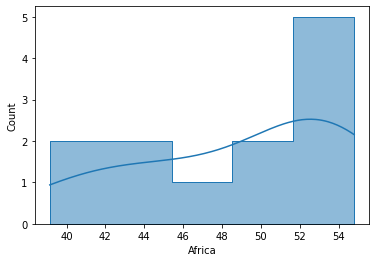

In [27]:
sns.histplot(data=pvt.Africa, 
             kde=True, 
             element="step")

<AxesSubplot:xlabel='Africa', ylabel='Count'>

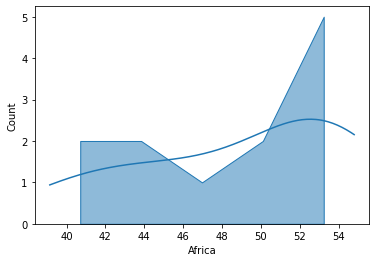

In [28]:
sns.histplot(data=pvt.Africa, 
             kde=True, 
             element="poly")

<AxesSubplot:ylabel='Count'>

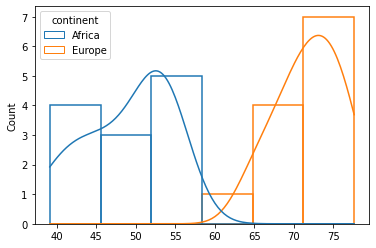

In [29]:
sns.histplot(data=pvt[["Africa", "Europe"]], 
             kde=True, 
             fill=False)

<AxesSubplot:ylabel='Count'>

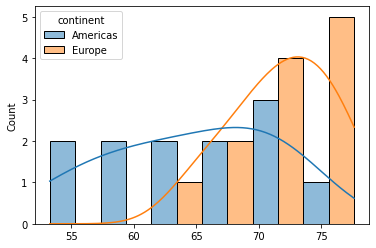

In [30]:
sns.histplot(data=pvt[["Americas", "Europe"]], 
             kde=True, 
             common_bins=True, 
             multiple="dodge")

<AxesSubplot:ylabel='Count'>

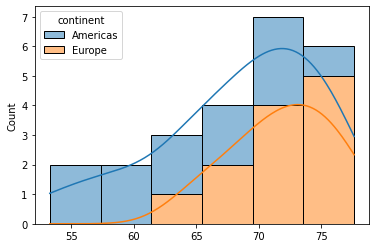

In [31]:
sns.histplot(data=pvt[["Americas", "Europe"]], 
             kde=True, 
             common_bins=True, 
             multiple="stack")

<AxesSubplot:ylabel='Count'>

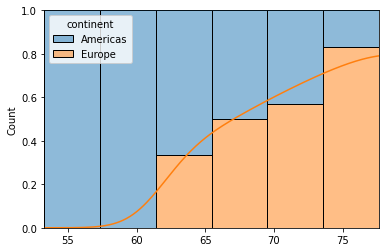

In [32]:
sns.histplot(data=pvt[["Americas", "Europe"]], 
             kde=True, 
             common_bins=True, 
             multiple="fill")

<AxesSubplot:ylabel='Count'>

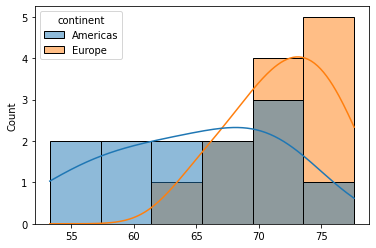

In [33]:
# по умолчанию multiple="dodge"
sns.histplot(data=pvt[["Americas", "Europe"]], 
             kde=True, 
             common_bins=True)

<AxesSubplot:ylabel='Count'>

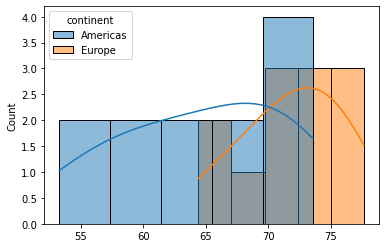

In [34]:
sns.histplot(data=pvt[["Americas", "Europe"]], 
             kde=True, common_bins=False)

### `kdeplot` (kernel density estimation)

[seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)

<AxesSubplot:xlabel='Africa', ylabel='Density'>

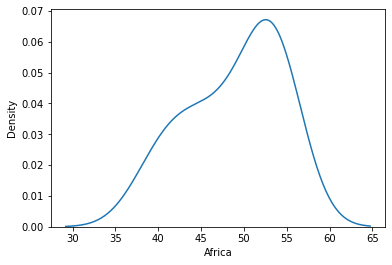

In [35]:
sns.kdeplot(data=pvt.Africa)

<AxesSubplot:xlabel='Africa', ylabel='Density'>

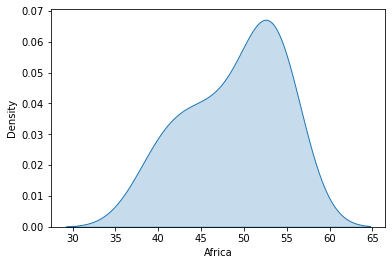

In [36]:
sns.kdeplot(data=pvt.Africa,
            shade=True)

<AxesSubplot:ylabel='Density'>

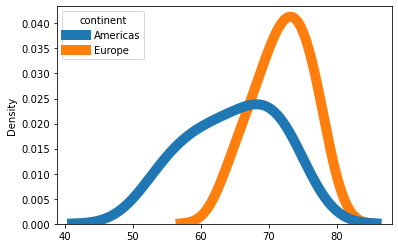

In [37]:
sns.kdeplot(data=pvt[["Americas", "Europe"]], 
            multiple="layer", 
            linewidth=10)

<AxesSubplot:ylabel='Density'>

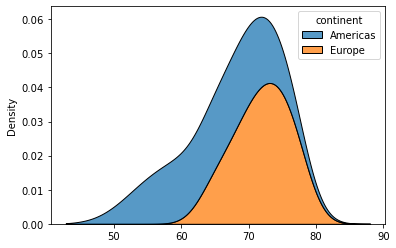

In [38]:
sns.kdeplot(data=pvt[["Americas", "Europe"]], 
            multiple="stack")

### *`ecdfplot` (empirical cumulative distribution functions)

**Выборочная (эмпирическая) функция распределения (Empirical Distribution Function = EDF или empirical Cumulative Distribution Function = eCDF)** в математической статистике — это приближение теоретической функции распределения, построенное с помощью выборки из него.

[seaborn.ecdfplot](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot)

In [39]:
pvt

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,39.14,53.28,46.31,64.41,69.25
1957,41.27,55.96,49.32,66.70,70.30
1962,43.32,58.40,51.56,68.54,71.09
1967,45.33,60.41,54.66,69.74,71.31
1972,47.45,62.39,57.32,70.78,71.91
1977,49.58,64.39,59.61,71.94,72.85
1982,51.59,66.23,62.62,72.81,74.29
1987,53.34,68.09,64.85,73.64,75.32
1992,53.63,69.57,66.54,74.44,76.94


<AxesSubplot:xlabel='Africa', ylabel='Proportion'>

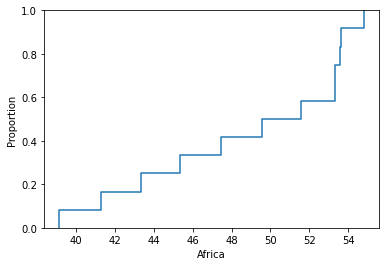

In [40]:
sns.ecdfplot(data=pvt.Africa)

<AxesSubplot:ylabel='Proportion'>

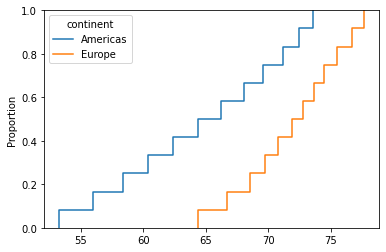

In [41]:
sns.ecdfplot(data=pvt[["Americas", "Europe"]])

### `rugplot` (marginal distributions)

**ВНИМАНИЕ:** Не путать с "Carpet plot"

Ковровый график (rug plot) - это график данных для одной количественной переменной, отображаемый в виде отметок вдоль оси.

Метод `rugplot` используется для визуализации распределения данных.

По сути, он аналогичен гистограмме (hist) с ячейками нулевой ширины или одномерному графику рассеяния (scatter).

Ковровые графики часто используются в сочетании с двумерными диаграммами рассеяния (scatter), помещая коврик (rug) для значений x данных вдоль оси x, и аналогично для значений y.

Отсюда и возник термин "коврик", поскольку эти ковровые площадки с перпендикулярными маркерами выглядят как кисточки по краям прямоугольного "коврика" диаграммы рассеяния.

[seaborn.rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot)

<AxesSubplot:>

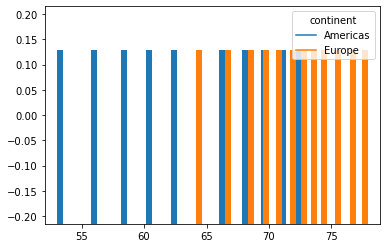

In [42]:
sns.rugplot(data=pvt[["Americas", "Europe"]], 
            height=0.8, 
            linewidth=6)

<AxesSubplot:xlabel='Africa', ylabel='Count'>

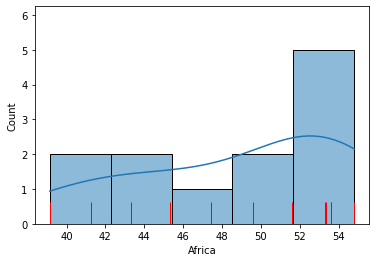

In [43]:
sns.histplot(data=pvt.Africa, kde=True)
sns.rugplot(data=pvt.Africa, 
            height=0.1, 
            color='red')

### `displot`

Эта функция обеспечивает доступ к нескольким подходам для визуализации одномерного или двумерного распределения данных, включая подмножества данных, определенных семантическим отображением и фасетированием по множеству подзаголовков.

Кроме того, `rugplot` может быть добавлен к любому типу графика для отображения отдельных наблюдений.


[seaborn.displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

По умолчанию `kind="hist"`

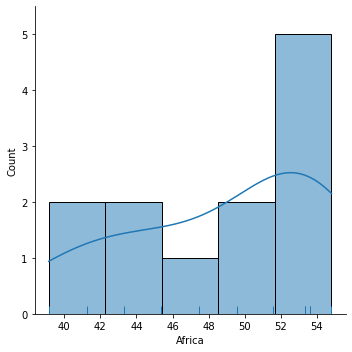

In [44]:
# hist + kde + rug
sns.displot(data=pvt.Africa, 
            kde=True, 
            rug=True)

## Categorical plots

### `stripplot`

Другие названия: dot plot, dot chart 

Диаграмма рассеяния (scatterplot), на которой одна переменная является категориальной.

Метод `stripplot` можно нарисовать отдельно, но `stripplot` также является хорошим дополнением к графику `box` или `violin` в тех случаях, когда нужно показать все наблюдения вместе с некоторым представлением основного распределения.

[seaborn. stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot)

<AxesSubplot:xlabel='continent'>

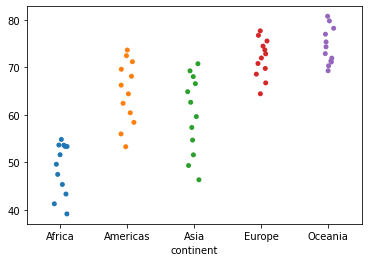

In [45]:
sns.stripplot(data=pvt)

<AxesSubplot:ylabel='continent'>

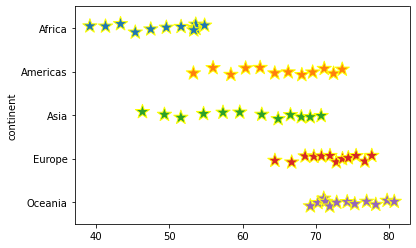

In [46]:
sns.stripplot(data=pvt, 
              orient='h', 
              size=15,
              linewidth=1, 
              edgecolor='yellow', 
              marker='*')

### `swarmplot`

Категориальная диаграмма рассеяния (`scatterplot`) с непересекающимися точками.


Похож на `stripplot`, но точки корректируются (только вдоль категориальной оси) так, чтобы они не перекрывались. Это дает лучшее представление о распределении значений, но плохо масштабируется для большого количества наблюдений.

Такой стиль диаграммы иногда называют `beeswarm`.

Метод `swarmplot` можно нарисовать отдельно, но `swarmplot` также является хорошим дополнением к графику `box` или `violin` в тех случаях, когда нужно показать все наблюдения вместе с некоторым представлением основного распределения.

[seaborn.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot)

<AxesSubplot:xlabel='continent'>

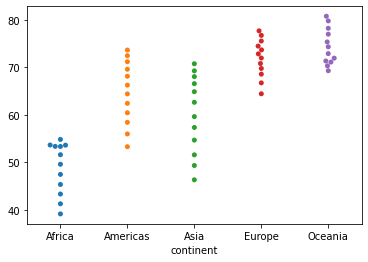

In [47]:
sns.swarmplot(data=pvt)

<AxesSubplot:ylabel='continent'>

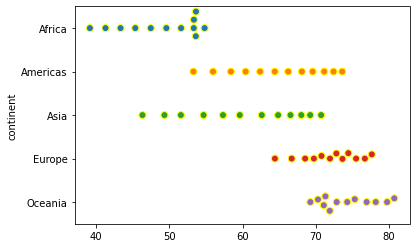

In [48]:
sns.swarmplot(data=pvt, 
              orient='h', 
              size=7,
              linewidth=1, 
              edgecolor='yellow')

### `boxplot`

[seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)

<AxesSubplot:ylabel='continent'>

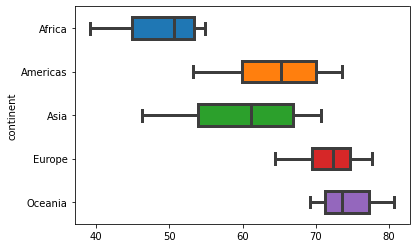

In [49]:
sns.boxplot(data=pvt, 
            orient='h', 
            saturation=1,
            width=0.5, 
            linewidth=3)

<AxesSubplot:xlabel='continent'>

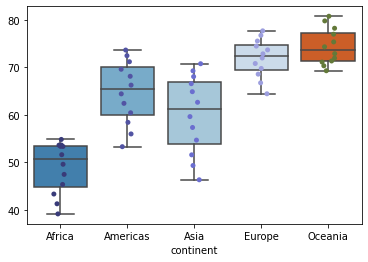

In [50]:
sns.boxplot(data=pvt, 
            palette='tab20c')

sns.stripplot(data=pvt, 
              palette='tab20b')

<AxesSubplot:xlabel='continent'>

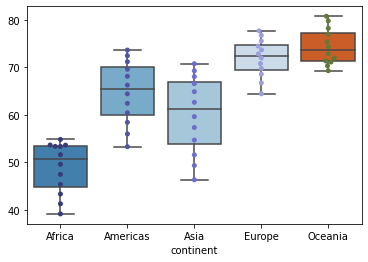

In [51]:
sns.boxplot(data=pvt, 
            palette='tab20c')

sns.swarmplot(data=pvt, 
              palette='tab20b')

### `violinplot`


`violinplot` - это комбинация `boxplot` и `kde` с каждой стороны.

Метод `violinplot` похожи на коробчатые диаграммы, за исключением того, что они также показывают плотность вероятности данных при различных значениях, обычно сглаженных с помощью оценщика плотности ядра.


[seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)

<AxesSubplot:xlabel='continent'>

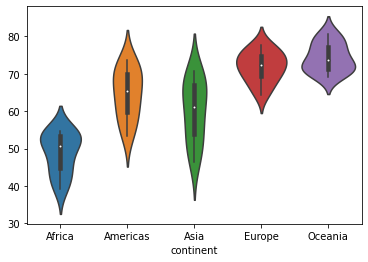

In [52]:
sns.violinplot(data=pvt)

<AxesSubplot:xlabel='continent'>

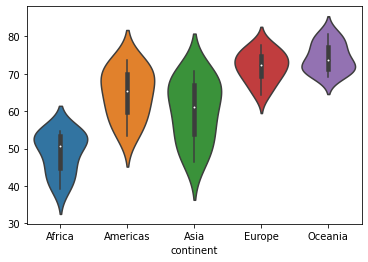

In [53]:
sns.violinplot(data=pvt, 
               scale="count")

<AxesSubplot:xlabel='continent'>

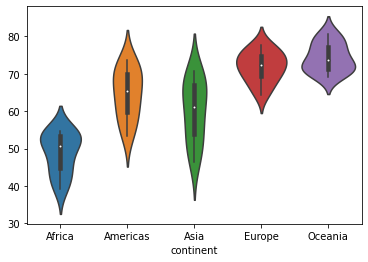

In [54]:
sns.violinplot(data=pvt, 
               scale="area")

<AxesSubplot:xlabel='continent'>

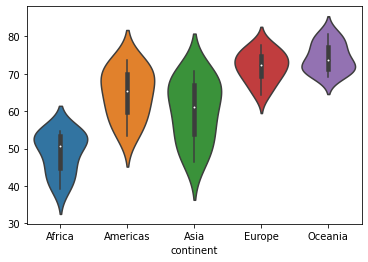

In [55]:
sns.violinplot(data=pvt, 
               scale="width")

<AxesSubplot:xlabel='continent'>

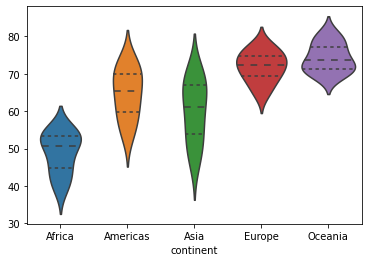

In [56]:
sns.violinplot(data=pvt, 
               inner="quartile")

<AxesSubplot:xlabel='continent'>

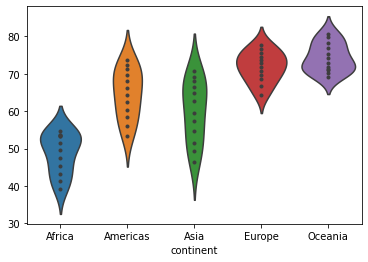

In [57]:
sns.violinplot(data=pvt, 
               inner="point")

<AxesSubplot:xlabel='continent'>

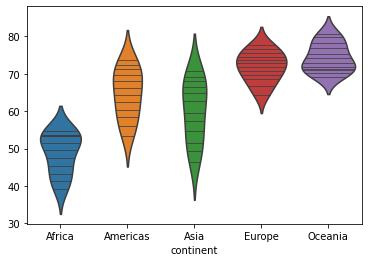

In [58]:
sns.violinplot(data=pvt, 
               inner="stick")

### `pointplot`

Точечный график представляет собой оценку центральной тенденции для числовой переменной по положению точек диаграммы рассеяния (scatter) и дает некоторое представление о неопределенности вокруг этой оценки с использованием планок (bar) погрешностей.

Точечные графики могут быть более полезными, чем гистограммы, для сравнений между разными уровнями одной или нескольких категориальных переменных.

Они особенно хорошо подходят для демонстрации взаимодействий: как отношения между уровни одной категориальной переменной меняются на разных уровнях второй категориальной переменной.

Линии, соединяющие каждую точку с одним и тем же уровнем оттенка, позволяют судить о взаимодействиях по разнице наклона, что проще для глаз, чем сравнение высоты нескольких групп точек или полос.

Важно помнить, что точечный график показывает только среднее (или другое оценочное) значение, но во многих случаях может быть более информативным показать распределение значений на каждом уровне категориальных переменных. В этом случае могут быть более подходящими другие подходы, такие как `boxplot` или `violinplot`.

*[Linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

[seaborn.pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot)

<AxesSubplot:xlabel='continent'>

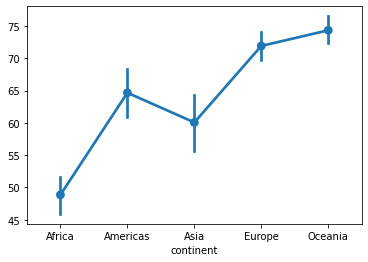

In [59]:
sns.pointplot(data=pvt)

<AxesSubplot:ylabel='continent'>

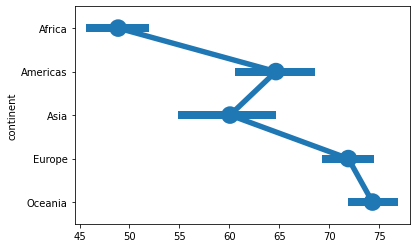

In [60]:
sns.pointplot(data=pvt, 
              orient='h', 
              scale=2, 
              errwidth=8)

<AxesSubplot:xlabel='year', ylabel='life_exp'>

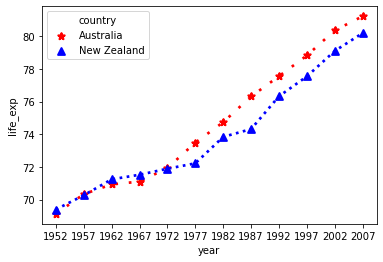

In [61]:
sns.pointplot(data=df[df.continent == "Oceania"],
              x='year', 
              y="life_exp", 
              hue="country",
              palette=['red', 'blue'],
              linestyles=[(0, (1, 4)), "dotted"],
              markers=["*", "^"])

### `barplot`

Доверительные интервалы в виде прямоугольных столбцов.

`barplot` представляет собой оценку центральной тенденции для числовой переменной высотой каждого прямоугольника и дает некоторое представление о неопределенности вокруг этой оценки с использованием столбцов ошибок (CI). 

[seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)

<AxesSubplot:xlabel='continent'>

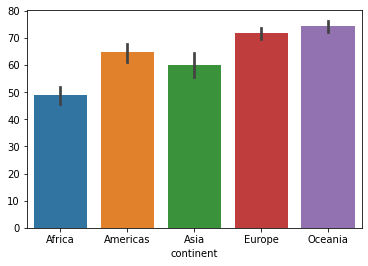

In [62]:
sns.barplot(data=pvt)

<AxesSubplot:ylabel='continent'>

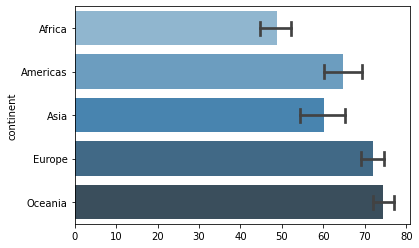

In [63]:
sns.barplot(data=pvt, 
            orient='h', 
            capsize=.3, 
            palette="Blues_d", 
            ci=99)

<AxesSubplot:xlabel='year', ylabel='life_exp'>

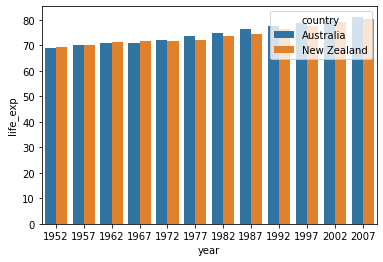

In [64]:
sns.barplot(data=df[df.continent == "Oceania"],
            x='year', 
            y="life_exp", 
            hue="country")

### `countplot`

Метод `countplot` можно рассматривать как гистограмму по категориальной, а не количественной переменной.

[seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)

In [65]:
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.35,706.16
1700,Zimbabwe,1992,10704340,Africa,60.38,693.42
1701,Zimbabwe,1997,11404948,Africa,46.81,792.45
1702,Zimbabwe,2002,11926563,Africa,39.99,672.04


<AxesSubplot:xlabel='continent', ylabel='count'>

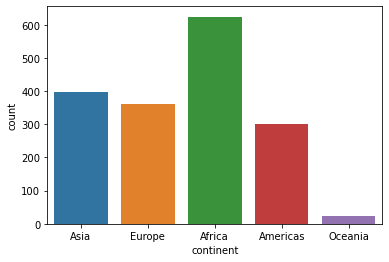

In [66]:
sns.countplot(data=df,
              x='continent')

### `catplot`

По умолчанию `kind="strip"`

[seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)

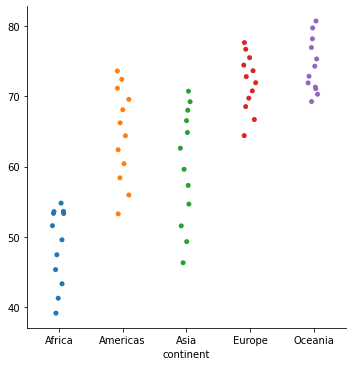

In [67]:
sns.catplot(data=pvt)

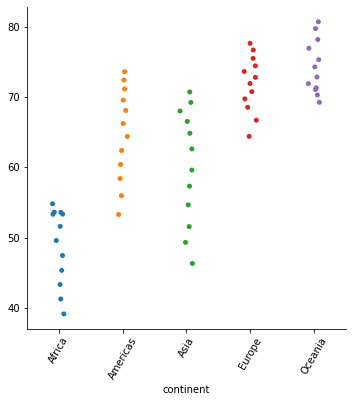

In [68]:
p = sns.catplot(data=pvt)
p.set_xticklabels(rotation=60)

## Дополнительные примеры

### `jointplot`

Отображает график двух переменных с помощью двумерных (bivariate) и одномерных (univariate) графиков.

Эта функция предоставляет удобный интерфейс с несколькими стандартными типами графиков (`kind: { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }`).

[seaborn.jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html)

In [69]:
oceania = df[df.continent == "Oceania"]
oceania

,country,year,population,continent,life_exp,gdp_cap
60,Australia,1952,8691212,Oceania,69.12,10039.60
61,Australia,1957,9712569,Oceania,70.33,10949.65
62,Australia,1962,10794968,Oceania,70.93,12217.23
63,Australia,1967,11872264,Oceania,71.10,14526.12
64,Australia,1972,13177000,Oceania,71.93,16788.63
65,Australia,1977,14074100,Oceania,73.49,18334.20
66,Australia,1982,15184200,Oceania,74.74,19477.01
67,Australia,1987,16257249,Oceania,76.32,21888.89
68,Australia,1992,17481977,Oceania,77.56,23424.77
69,Australia,1997,18565243,Oceania,78.83,26997.94


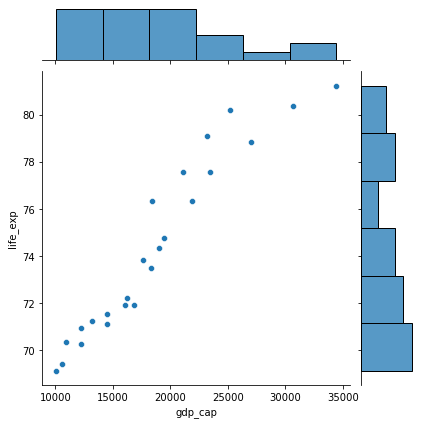

In [70]:
sns.jointplot(x=oceania.gdp_cap, 
              y=oceania.life_exp)

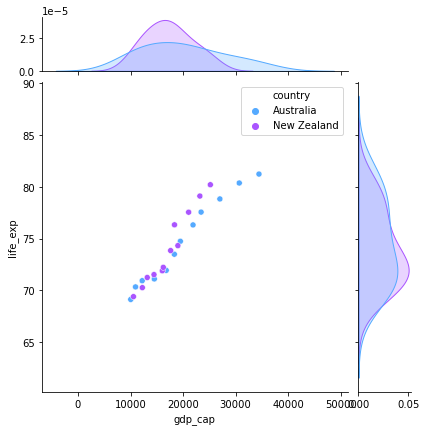

In [71]:
sns.jointplot(x=oceania.gdp_cap, 
              y=oceania.life_exp,
              hue=oceania.country,
              marginal_ticks=True, 
              palette='cool')

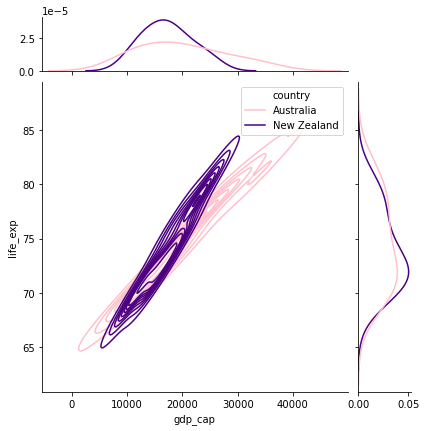

In [72]:
sns.jointplot(x=oceania.gdp_cap, 
              y=oceania.life_exp,
              hue=oceania.country,
              marginal_ticks=True,
              kind='kde', 
              palette=['pink', 'indigo'])